In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf
import PIL.ImageOps as ImageOps
import pandas as pd
import PIL.Image as Image
from tqdm import tqdm
import tensorflow_datasets as tfds
from tensorflow.keras import layers

In [ ]:
class_names = ["Arive-Dantu", "Basale", "Betel", "Crape_Jasmine", "Curry", "Drumstick", "Fenugreek", "Guava", "Hibiscus", "Indian_Beech",
               "Indian_Mustard", "Jackfruit", "Jamaica_Cherry-Gasagase", "Jamun", "Jasmine", "Karanda", "Lemon",
               "Mango", "Mexican_Mint", "Mint", "Neem", "Oleander", "Parijata", "Peepal", "Pomegranate", "Rasna", "Rose_apple",
               "Roxburgh_fig", "Sandalwood", "Tulsi"]
class_names_label = {class_name: i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)


In [ ]:
def pre_process(img_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE) 
    return image

In [ ]:
def load_data():
    
    datasets = ["/content/gdrive/MyDrive/AI HACK/PLANT/TRAIN","/content/gdrive/MyDrive/AI HACK/PLANT/TEST"]
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = pre_process(img_path) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading /content/gdrive/MyDrive/AI HACK/PLANT/TRAIN


100%|██████████| 497/497 [00:11<00:00, 44.80it/s] 


Loading /content/gdrive/MyDrive/AI HACK/PLANT/TEST


100%|██████████| 125/125 [00:03<00:00, 41.06it/s] 


In [ ]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 12959
Number of testing examples: 3265
Each image is of size: (150, 150)


In [ ]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [ ]:
def display_examples(class_names, images, labels):
    
    fig = plt.figure(figsize=(15,15))
    fig.suptitle("EXAMPLES OF IMAGES FROM THE DATASET", fontsize=16)
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]],fontsize=10)
    plt.show()

In [ ]:
def display_random_image(class_names, images, labels):
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

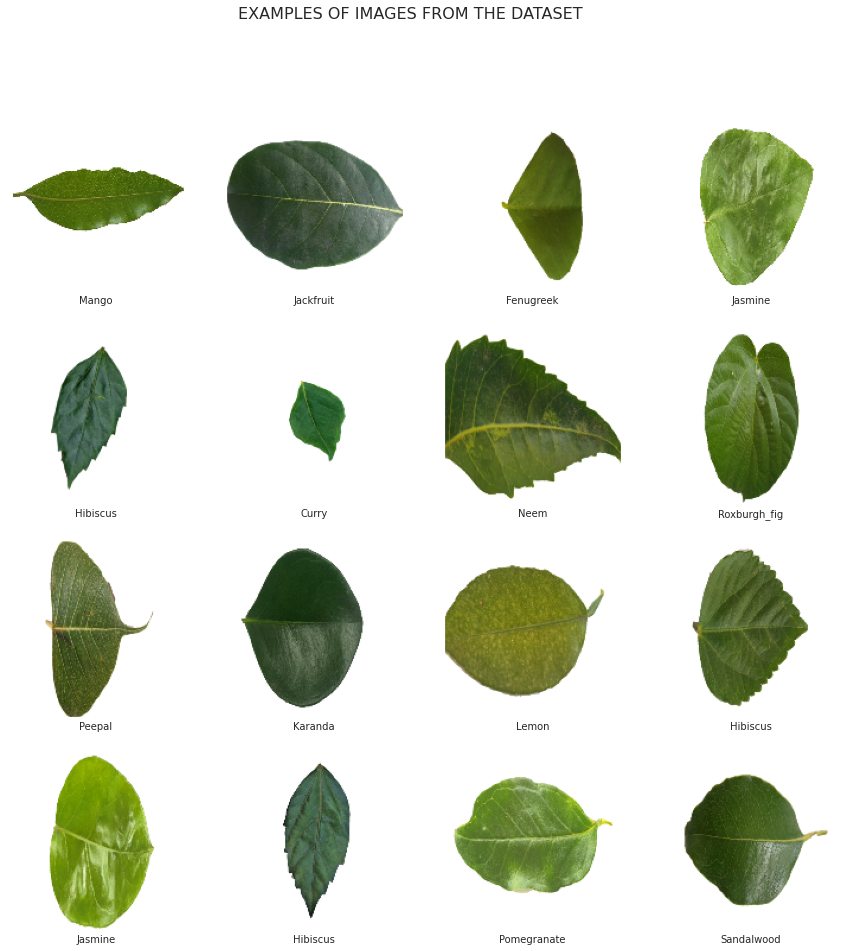

In [ ]:
display_examples(class_names, train_images, train_labels)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(30, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


81/81 [==============================] - 272s 3s/step - loss: 2.1470 - accuracy: 0.3827 - val_loss: 1.2109 - val_accuracy: 0.6354
Epoch 2/20
81/81 [==============================] - 269s 3s/step - loss: 0.8923 - accuracy: 0.7331 - val_loss: 0.6802 - val_accuracy: 0.7890
Epoch 3/20
81/81 [==============================] - 269s 3s/step - loss: 0.5212 - accuracy: 0.8408 - val_loss: 0.4894 - val_accuracy: 0.8441
Epoch 4/20
81/81 [==============================] - 270s 3s/step - loss: 0.3164 - accuracy: 0.9035 - val_loss: 0.3506 - val_accuracy: 0.8827
Epoch 5/20
81/81 [==============================] - 269s 3s/step - loss: 0.2233 - accuracy: 0.9303 - val_loss: 0.3185 - val_accuracy: 0.9001
Epoch 6/20
81/81 [==============================] - 268s 3s/step - loss: 0.1594 - accuracy: 0.9507 - val_loss: 0.2833 - val_accuracy: 0.9113
Epoch 7/20
81/81 [==============================] - 267s 3s/step - loss: 0.1113 - accuracy: 0.9677 - val_loss: 0.2419 - val_accuracy: 0.9302
Epoch 8/20
81/81 [======

In [ ]:
def plot_accuracy_loss(history):
    """
        We plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

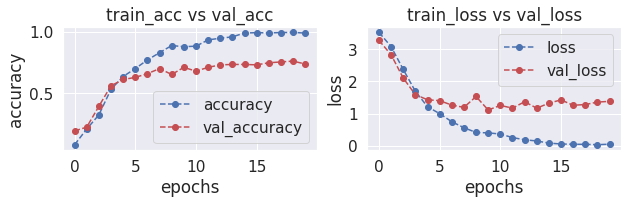

In [ ]:
plot_accuracy_loss(history)

In [ ]:
test_loss = model.evaluate(test_images, test_labels)

103/103 [==============================] - 22s 215ms/step - loss: 0.2865 - accuracy: 0.9292


103/103 [==============================] - 23s 219ms/step


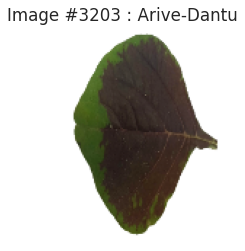

In [ ]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [ ]:
data = np.ndarray(shape=(1, 150, 150, 3), dtype=np.float32)
image = Image.open('/content/gdrive/MyDrive/AI HACK/PLANT/TEST/Jackfruit/AH-S-020.jpg')
#image sizing
size = (150, 150)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
    

pred_label = np.argmax(prediction, axis = 1) # We take the highest probability
class_prediction = class_names[pred_label[0]]
class_prediction

1/1 [==============================] - 0s 53ms/step


'Jackfruit'

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/AI HACK/details.csv')
df

,Class,Scientific Name,Disease Treated,Preparation Method,Administration
0,Arive-Dantu,Amaranthus Viridis,"inflammation, bronchitis, asthma, cough, indig...",Paste (External use),External apply
1,Basale,Basella Alba,"fever, colds, bronchitis, asthma, stomach diso...","Crushed, Decoction",Oral
2,Betel,Piper Betle,"rheumatoid arthritis, diabetes, cancer, cough",tailored by Tagrida and Benjakul,Stream
3,Crape_Jasmine,Tabernaemontana Divaricata,"anti-epileptic, anti-mania, brain tonic, and ...",propagated through seeds,Oral
4,Curry,Murraya Koenigii,"piles, inflammation, itching, fresh cuts, dyse...",Raw,Oral
5,Drumstick,Moringa Oleifera,"stomach disorders, such as constipation, gast...",Raw,Oral
6,Fenugreek,Trigonella Foenum-graecum,"kidney ailments, beriberi, mouth ulcers, boil...",Dissolve with groundnut oil,Oral
7,Guava,Psidium Guajava,"diarrhea, dysentery, stomach aches, and indige...",Chopped and boiled,oral
8,Hibiscus,Rosa-sinensis,"appetite, colds, heart and nerve diseases, upp...","Crushed , Decoction",Oral
9,Indian_Beech,Pongamia Pinnata,"tumors, piles, skin diseases, and ulcers",stem cuttings,External apply


In [ ]:
df.iloc[29,0]

'Tulsi'

In [ ]:
def answer(class_prediction):
  for i in range (0,29):
    if class_prediction==df.iloc[i,0]:
      print("The plant that you have uploaded is : ",df.iloc[i,0])
      print("Scientific Name : ",df.iloc[i,1])
      print("Disease Treated : ",df.iloc[i,2])
      print("Preparation Method : ",df.iloc[i,3])
      print("Administration : ",df.iloc[i,4])

In [ ]:
answer(class_prediction)

The plant that you have uploaded is :  Jackfruit
Scientific Name :  Artocarpus Heterophyllus
Disease Treated :  inflammation, malarial fever, kidney stones, ulcers, infected wounds, diarrhea, fever, asthma, anemia, and dermatitis
Preparation Method :  Boil
Administration :  Oral


In [ ]:
model.save('MED_PLANT_SNAP(19.03.2023).h5')